In [1]:
# Australian Bonds

# This project will analyse both Australian government and Australian corporate bonds over the past 20 yeats. Specifically, it will look to understand 
# interactions with marcoeconomic variables like inflation and unemployment including volatility price movement. 

# Summary of Contents 

# Introduction 
# Summary
# Data Inspection and Cleaning 
# Analysis and Answers to Questions
# Conclusions and Discussion 
# Future Analysis 
# References

In [2]:
# Start by importing required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
## Australian Corporate Bond Monthly Data Download
df_corp = pd.read_csv("f03hist.csv",
    header=1,       # header row
    index_col=0,    # first column as index
    skiprows=range(2, 11)  # skip metadata rows
)
df_corp.index.name = None

#print(df_corp.columns)  # To look at current column names 
#print(df_corp.shape)    # To analyse number of columns not including title column

df_corp = df_corp[[c for c in df_corp.columns if ("Number of bonds" not in c) and (not c.startswith("Unnamed"))]]  # Keep only meaningful columns: remove any columns that count number of bonds or have no header
df_corp.columns = [         # Rename for ease of use where t = tenor, y = yield
    "A_3yr_t", "A_3yr_y",
    "A_5yr_t", "A_5yr_y",
    "A_7yr_t", "A_7yr_y",
    "A_10yr_t", "A_10yr_y",
    "BBB_3yr_t", "BBB_3yr_y",
    "BBB_5yr_t", "BBB_5yr_y",
    "BBB_7yr_t", "BBB_7yr_y",
    "BBB_10yr_t", "BBB_10yr_y"
]

df_corp.index = pd.to_datetime(df_corp.index, dayfirst=True, errors='coerce')

print(df_corp.iloc[:5, :4])


## Australian Government Bond Monthly Data Download
df_gvt_mth = pd.read_csv("f02hist.csv",
    header = 1,       # header row
    index_col = 0,    # first column as index
    skiprows = range(2, 11)  # skip metadata rows
)
df_gvt_mth.index.name = None

#print(df_gvt_mth.columns)  # To look at current column names 
#print(df_gvt_mth.shape)    # To analyse number of columns not including title column

df_gvt_mth = df_gvt_mth.iloc[:, :5]  # Upon inspection of columns, we only need the first 5. Retain first 5 columns 
df_gvt_mth.columns = ['g_2yr_y_m', 'g_3yr_y_m', 'g_5yr_y_m', 'g_10yr_y_m', 'g_indexed_y_m'] # Rename for ease of use where g = government, y = yield, monthly = m

df_gvt_mth.index = pd.to_datetime(df_gvt_mth.index, format='%d-%b-%Y', dayfirst=True)

print(df_gvt_mth.iloc[:5, :5])


## Australian Government Bond Daily Data Download
df_gvt_day = pd.read_csv(
    "f02d.csv",
    header=1,           # header row
    index_col=0,        # first column as index
    skiprows=range(2, 11)  # skip metadata rows
)
df_gvt_day.index.name = None

# Keep only the first 4 columns and rename
df_gvt_day = df_gvt_day.iloc[:, :4]
df_gvt_day.columns = ['g_2yr_y_d', 'g_3yr_y_d', 'g_5yr_y_d', 'g_10yr_y_d']

# Ensure all dates have the same format: dayfirst=True
# Remove rows where parsing fails
from dateutil import parser

def parse_date_mixed(date_str):
    try:
        # parser.parse can handle multiple formats automatically
        return parser.parse(date_str, dayfirst=True)
    except Exception:
        return pd.NaT  # only if truly invalid

# Apply to the index
df_gvt_day.index = df_gvt_day.index.map(parse_date_mixed)

# Keep only rows with successfully parsed dates
df_gvt_day = df_gvt_day[df_gvt_day.index.notna()]
# If some rows didn't match the format, they will raise an error above.
# Check for duplicates or inconsistencies
df_gvt_day = df_gvt_day[df_gvt_day.index.notna()]
# Print first 5 rows and last 30 rows
print(df_gvt_day.iloc[:5, :4])
print(df_gvt_day.tail(30))



## Australian Quarterly CPI Data
df_CPI = pd.read_csv("cpidata.csv",
    header = 0,       # header row
    index_col = 0,    # first column as index
)
df_CPI.index.name = None

#print(df_CPI.columns)  # To look at current column names
#print(df_CPI.shape)    # To analyse number of columns not including title column

df_CPI = df_CPI.iloc[:, [1,2]]
df_CPI.columns = ['CPI_headline','CPI_fore']

df_CPI.index = df_CPI.index.str.replace(r"\s*\(Q\d\)", "", regex=True)

df_CPI.index = pd.to_datetime(df_CPI.index, format='mixed', dayfirst=True)

df_CPI[df_CPI.columns[0]] = df_CPI[df_CPI.columns[0]].str.replace("%", "", regex = False).astype(float)  # Remove % sign from column0 (RBA cash rate change) and change to float
df_CPI[df_CPI.columns[1]] = df_CPI[df_CPI.columns[1]].str.replace("%", "", regex = False).astype(float)  # Remove % sign from column1 (RBA target rate) and change to float

df_CPI.index = pd.to_datetime(df_CPI.index, dayfirst = True, errors = 'coerce')
df_CPI = df_CPI.iloc[::-1]

print(df_CPI.iloc[:5, :2])



## Australian Cash Rate Historical 
df_CR = pd.read_csv("a02hist.csv",
    header = 1,       # header row
    index_col = 0,    # first column as index
    skiprows = range(2, 11)  # skip metadata rows
                    
)
df_CR.index.name = None

#print(df_CR.columns)  # To look at current column names
#print(df_CR.shape)    # To analyse number of columns not including title column

df_CR = df_CR.iloc[:, [0,1]]
df_CR.columns = ['CR_change','CR_level']
df_CR = df_CR.drop(df_CR.index[[0, 1, 2]])

df_CR.index = pd.to_datetime(df_CR.index, format='%d-%b-%Y', dayfirst=True)
df_CR['CR_level'] = pd.to_numeric(df_CR['CR_level'], errors='coerce')


print(df_CR.iloc[:5, :2])

            A_3yr_t  A_3yr_y  A_5yr_t  A_5yr_y
2005-01-31     2.68     5.95     4.02     6.00
2005-02-28     2.42     6.18     4.13     6.25
2005-03-31     2.43     6.27     4.21     6.35
2005-04-30     2.39     5.94     4.26     6.02
2005-05-31     2.65     5.81     4.17     5.85
            g_2yr_y_m  g_3yr_y_m  g_5yr_y_m  g_10yr_y_m  g_indexed_y_m
2013-05-31        NaN        NaN        NaN       3.324            NaN
2013-06-30        NaN        NaN        NaN       3.555            NaN
2013-07-31        NaN        NaN        NaN       3.772            NaN
2013-08-31        NaN        NaN        NaN       3.894            NaN
2013-09-30      2.688        2.9      3.331       4.033            NaN


C:\Users\Adam\AppData\Local\Temp\ipykernel_26276\2724548391.py:30: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gvt_mth = pd.read_csv("f02hist.csv",
C:\Users\Adam\AppData\Local\Temp\ipykernel_26276\2724548391.py:49: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_gvt_day = pd.read_csv(


            g_2yr_y_d  g_3yr_y_d  g_5yr_y_d  g_10yr_y_d
2013-05-20        NaN        NaN        NaN       3.229
2013-05-21        NaN        NaN        NaN       3.263
2013-05-22        NaN        NaN        NaN       3.272
2013-05-23        NaN        NaN        NaN       3.299
2013-05-24        NaN        NaN        NaN       3.316
            g_2yr_y_d  g_3yr_y_d  g_5yr_y_d  g_10yr_y_d
2025-10-02      3.485      3.533      3.717       4.328
2025-10-03      3.493      3.540      3.722       4.323
2025-10-06        NaN        NaN        NaN         NaN
2025-10-07      3.511      3.558      3.754       4.378
2025-10-08      3.504      3.549      3.738       4.354
2025-10-09      3.509      3.550      3.730       4.339
2025-10-10      3.528      3.570      3.749       4.354
2025-10-13      3.468      3.499      3.678       4.282
2025-10-14      3.421      3.450      3.627       4.224
2025-10-15      3.433      3.459      3.626       4.206
2025-10-16      3.345      3.369      3.548     

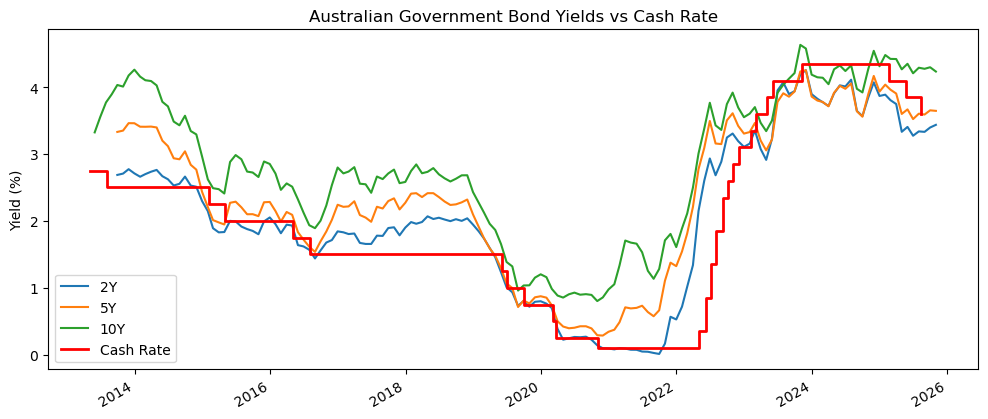

NameError: name 'y' is not defined

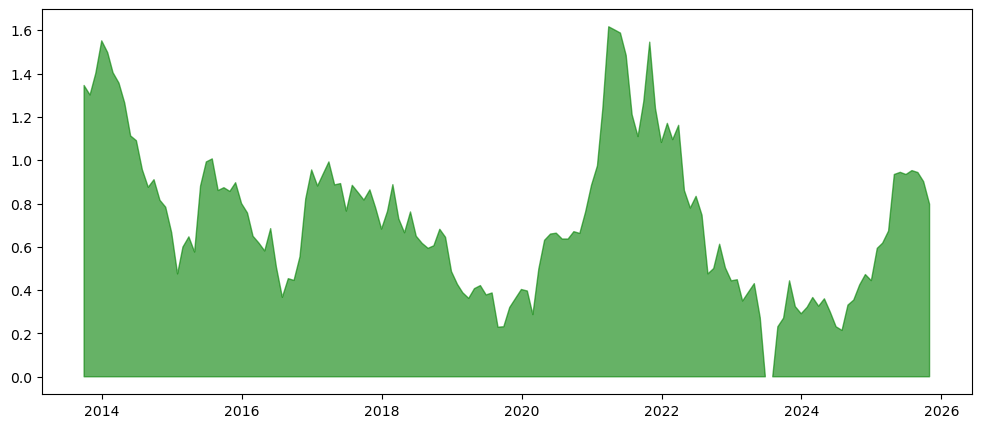

In [4]:
## Q1 How have Australian yields across the curve (2y, 5y, 10y) moved over the past 12 years?



#df_CR = df_CR[~df_CR.index.isna()]
#df_CR = df_CR.sort_index()

#df_CR = df_CR[~df_CR.index.duplicated(keep='last')]

ax = df_gvt_mth[['g_2yr_y_m', 'g_5yr_y_m', 'g_10yr_y_m']].plot(
    figsize=(12,5),
    title='Australian Government Bond Yields vs Cash Rate',
    ylabel='Yield (%)',
    grid=True
)

df_CR = df_CR[df_CR.index >= '2013-05-01']
df_CR['CR_level'].plot(ax=ax, drawstyle='steps-post', color='red', linewidth=2)

ax.legend(['2Y', '5Y', '10Y', 'Cash Rate'])
plt.show()


df_gvt_mth['Slope_10y_2y'] = df_gvt_mth['g_10yr_y_m'] - df_gvt_mth['g_2yr_y_m']  # Create a new variable in our df_corp

plt.figure(figsize = (12,5))
plt.fill_between(df_gvt_mth.index, df_gvt_mth['Slope_10y_2y'], 0, where = (df_gvt_mth['Slope_10y_2y'] >= 0), interpolate = True, color = 'green', alpha = 0.6, label = 'Normal')
plt.fill_between(df_gvt_mth.index, df_gvt_mth['Slope_10y_2y'], 0, where = (y < 0), interpolate = True, color = 'red', alpha = 0.8, label = 'Inverted')

plt.axhline(0, color = 'black', linestyle='--', linewidth = 1)

plt.title('10Y-2Y Yield Curve Slope')
plt.ylabel('Percentage Points')
plt.legend()
plt.grid(True)
plt.show




In [ ]:
# Ensure index is datetime
df_gvt_day.index = pd.to_datetime(df_gvt_day.index)

# Pick the most recent date reliably
most_recent = df_gvt_day.index.max()  # safest

three_months_ago = most_recent - pd.DateOffset(months=3)
one_year_ago = most_recent - pd.DateOffset(years=1)

# --- Helper function: find closest date robustly ---
def get_closest_yield(target_date):
    # Compute absolute difference to all dates
    abs_diff = np.abs(df_gvt_day.index - target_date)
    idx = abs_diff.argmin()  # index of minimum difference
    return df_gvt_day.iloc[idx]

# --- Build dataframe of selected yields ---
df_selected = pd.DataFrame({
    'Date': ['1 Year Ago', '3 Months Ago', 'Most Recent'],
    '2Y': [get_closest_yield(one_year_ago)['g_2yr_y_d'],
           get_closest_yield(three_months_ago)['g_2yr_y_d'],
           get_closest_yield(most_recent)['g_2yr_y_d']],
    '3Y': [get_closest_yield(one_year_ago)['g_3yr_y_d'],
           get_closest_yield(three_months_ago)['g_3yr_y_d'],
           get_closest_yield(most_recent)['g_3yr_y_d']],
    '5Y': [get_closest_yield(one_year_ago)['g_5yr_y_d'],
           get_closest_yield(three_months_ago)['g_5yr_y_d'],
           get_closest_yield(most_recent)['g_5yr_y_d']],
    '10Y': [get_closest_yield(one_year_ago)['g_10yr_y_d'],
            get_closest_yield(three_months_ago)['g_10yr_y_d'],
            get_closest_yield(most_recent)['g_10yr_y_d']]
})

print(df_selected)

# --- Plot ---
df_selected.set_index('Date').T.plot(marker='o')
plt.title('Australian Government Bond Yields')
plt.ylabel('Yield (%)')
plt.xlabel('Maturity')
plt.grid(True)
plt.show()


In [ ]:
## Q2 How do credit spreads of different tenor and credit rating behave during crisis? 


df_corp = df_corp[df_corp.index >= "2013-05-01"]                                          # Filter corporate data to start at May 2013 when 
df_all = df_corp.merge(df_gvt_mth, left_index = True, right_index = True, how = "inner")  # Merge monthly corporate data with monthly government data

# Calculate credit spreads in basis points 
df_all['A_3yr_spread']  = (df_all['A_3yr_y']  - df_all['g_3yr_y_m']) * 100
df_all['A_5yr_spread']  = (df_all['A_5yr_y']  - df_all['g_5yr_y_m']) * 100
df_all['A_10yr_spread'] = (df_all['A_10yr_y'] - df_all['g_10yr_y_m']) * 100
df_all['BBB_3yr_spread']  = (df_all['BBB_3yr_y']  - df_all['g_3yr_y_m']) * 100
df_all['BBB_5yr_spread']  = (df_all['BBB_5yr_y']  - df_all['g_5yr_y_m']) * 100
df_all['BBB_10yr_spread'] = (df_all['BBB_10yr_y'] - df_all['g_10yr_y_m']) * 100

# Calculate the monthly change in credit spreads 
df_all['A_3yr_spread_diff']  = df_all['A_3yr_spread'].diff()
df_all['A_5yr_spread_diff']  = df_all['A_5yr_spread'].diff()
df_all['A_10yr_spread_diff'] = df_all['A_10yr_spread'].diff()
df_all['BBB_3yr_spread_diff']  = df_all['BBB_3yr_spread'].diff()
df_all['BBB_5yr_spread_diff']  = df_all['BBB_5yr_spread'].diff()
df_all['BBB_10yr_spread_diff'] = df_all['BBB_10yr_spread'].diff()

# Create new dataframe for spreads and change in spreads through covid (2020)
df_spread_covid = df_all.loc["2020-01-01":"2020-12-31", [
    'A_3yr_spread', 'A_5yr_spread', 'A_10yr_spread',
    'A_3yr_spread_diff', 'A_5yr_spread_diff', 'A_10yr_spread_diff',
    'BBB_3yr_spread', 'BBB_5yr_spread', 'BBB_10yr_spread',
    'BBB_3yr_spread_diff', 'BBB_5yr_spread_diff', 'BBB_10yr_spread_diff'
]]


# Create first plot of Actual Spreads throughout covid
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
fig.suptitle("Monthly Change in Credit Spreads During COVID Period", fontsize=16, fontweight='bold')

axes[0].plot(df_spread_covid.index, df_spread_covid['A_3yr_spread_diff'], label='A 3Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_5yr_spread_diff'], label='A 5Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_10yr_spread_diff'], label='A 10Y')
axes[0].axhline(0, color='black', linewidth=1, linestyle='--')
axes[0].set_title("A-rated Monthly Spread Changes")
axes[0].set_ylabel("Change in Spread (bps)")
axes[0].legend()

axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_3yr_spread_diff'], label='BBB 3Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_5yr_spread_diff'], label='BBB 5Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_10yr_spread_diff'], label='BBB 10Y')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_title("BBB-rated Monthly Spread Changes")
axes[1].set_ylabel("Change in Spread (bps)")
axes[1].set_xlabel("Date")
axes[1].legend()


plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45) # To totate x axis labels
plt.tight_layout(rect=[0, 0, 1, 0.97])                     # Adjusts subplots paramaters to fit nicely
plt.show()






fig, axes = plt.subplots(1, 2, figsize = (8, 6), sharex = True)
fig.suptitle("Monthly Credit Spreads During COVID Period", fontsize = 16, fontweight = 'bold')

axes[0].plot(df_spread_covid.index, df_spread_covid['A_3yr_spread'], label='A 3Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_5yr_spread'], label='A 5Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_10yr_spread'], label='A 10Y')
axes[0].set_title("A-rated Credit Spreads Across Tenors (COVID period)")
axes[0].set_ylabel("Spread (bps)")
axes[0].legend()
axes[0].grid(True)

axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_3yr_spread'], label='BBB 3Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_5yr_spread'], label='BBB 5Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_10yr_spread'], label='BBB 10Y')
axes[1].set_title("BBB-rated Credit Spreads Across Tenors (COVID period)")
axes[1].set_ylabel("Spread (bps)")
axes[1].set_xlabel("Date")
axes[1].legend()
axes[1].grid(True)

plt.xticks(rotation = 45)  # Rotate x axis labels for better fit
plt.tight_layout()        # Tighten Layout 
plt.show()

In [ ]:
## Q3 Between tenor and risk rating, what makes Australian bonds more volatile? 


# Slice spread change columns for 2Y, 5Y, 10Y
spread_cols = [
    'A_3yr_spread_diff','A_5yr_spread_diff','A_10yr_spread_diff',
    'BBB_3yr_spread_diff','BBB_5yr_spread_diff','BBB_10yr_spread_diff'
]

# Initialize list to hold stats
summary_list = []

# Tenors and ratings for labels
tenors = ['2Y', '5Y', '10Y']
ratings = ['A', 'BBB']

# Loop through each rating and tenor to compute stats
for rating in ratings:
    for tenor in tenors:
        col_name = f'{rating}_{tenor.replace("2Y","3yr").replace("5Y","5yr").replace("10Y","10yr")}_spread_diff'
        data = df_all.loc["2013-05-01":, col_name]  # last 10 years
        summary_list.append({
            'Rating': rating,
            'Tenor': tenor,
            'Std Dev (bps)': round(data.std(), 2),
            'Max (bps)': round(data.max(), 2),
            'Min (bps)': round(data.min(), 2),
            'IQR (bps)': round(data.quantile(0.75) - data.quantile(0.25), 2)
        })

# Convert to DataFrame
summary_stats = pd.DataFrame(summary_list)
print(summary_stats)



x_min = df_all.loc["2013-05-01":, spread_cols].min().min()
x_max = df_all.loc["2013-05-01":, spread_cols].max().max()

# For y-axis, approximate maximum frequency across all histograms
y_max = 0
for col in spread_cols:
    data = df_all.loc["2013-05-01":, col].dropna()  # drop NaNs
    freq, _ = np.histogram(data, bins=30)
    if freq.max() > y_max:
        y_max = freq.max()

# Create figure with shared x and y axes
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex=True, sharey=True)
fig.suptitle("Distribution of Monthly Spread Changes (Last 12 Years)", fontsize=16, fontweight='bold')

ratings = ['A', 'BBB']
tenors = ['3yr', '5yr', '10yr']
colors = {'A':'blue','BBB':'red'}

for i, rating in enumerate(ratings):
    for j, tenor in enumerate(tenors):
        col_name = f'{rating}_{tenor}_spread_diff'
        data = df_all.loc["2013-05-01":, col_name].dropna()  # drop NaNs
        sns.histplot(data, bins=30, kde=True, color=colors[rating], alpha=0.6, ax=axes[i,j])
        axes[i,j].axvline(0, color='black', linestyle='--', linewidth=1)
        axes[i,j].set_title(f"{rating}-rated {tenor.upper()}")
        axes[i,j].set_ylabel("Frequency")
        axes[i,j].set_xlabel("Monthly Spread Change (bps)")
        axes[i,j].set_xlim(x_min, x_max)
        axes[i,j].set_ylim(0, y_max + 1)  # same y-axis for all

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:

df_all['Year'] = df_all.index.year.astype(str)

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(15,6), sharex=True, sharey=True)

# --- A-rated subplot (allow legend here first) ---
a_plot = sns.scatterplot(
    ax=axes[0],
    x=df_all['A_3yr_spread'],
    y=df_all['A_10yr_spread'],
    hue=df_all['Year'],
    palette='viridis'
)

axes[0].set_title("A-rated: 2Y vs 10Y Credit Spreads", fontsize=13, fontweight='bold')
axes[0].set_xlabel("2Y Spread (bps)")
axes[0].set_ylabel("10Y Spread (bps)")

# --- Extract legend BEFORE killing it ---
handles, labels = axes[0].get_legend_handles_labels()

# Remove local legend to avoid duplication
axes[0].get_legend().remove()

# --- BBB-rated subplot (no legend needed here) ---
sns.scatterplot(
    ax=axes[1],
    x=df_all['BBB_3yr_spread'],
    y=df_all['BBB_10yr_spread'],
    hue=df_all['Year'],
    palette='magma',
    legend=False
)

axes[1].set_title("BBB-rated: 2Y vs 10Y Credit Spreads", fontsize=13, fontweight='bold')
axes[1].set_xlabel("2Y Spread (bps)")
axes[1].set_ylabel("")

# --- Shared legend for whole figure ---
fig.legend(
    handles,
    labels,
    title="Year",
    bbox_to_anchor=(1.05, 0.5),
    loc='center left'
)

plt.tight_layout()
plt.show()



from scipy.stats import linregress

def test_slope_significance(x, y, label):
    # Combine into one df and drop missing rows
    df_tmp = pd.DataFrame({"x": x, "y": y}).dropna()

    if df_tmp.empty:
        print(f"--- {label} ---")
        print("No valid data points after dropping NaNs.\n")
        return

    result = linregress(df_tmp["x"], df_tmp["y"])

    slope = result.slope
    p_value = result.pvalue
    significance = "SIGNIFICANT at 5%" if p_value < 0.05 else "NOT significant at 5%"

    print(f"--- {label} ---")
    print(f"N: {len(df_tmp)} observations")
    print(f"Slope: {slope:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Conclusion: {significance}\n")


# Run tests for A-rated spreads
test_slope_significance(
    df_all["A_3yr_spread"],
    df_all["A_10yr_spread"],
    label="A-rated (2Y → 10Y)"
)

# Run tests for BBB-rated spreads
test_slope_significance(
    df_all["BBB_3yr_spread"],
    df_all["BBB_10yr_spread"],
    label="BBB-rated (2Y → 10Y)"
)



In [ ]:
# Ensure the index is datetime
all_dates_after_baseline = df_merged.index[df_merged.index > baseline_date]
event_date = all_dates_after_baseline[day_label - 1]


event_rows = []

for date, row in df_merged[df_merged['CPI_surprise'].notna()].iterrows():
    event_id = date.strftime("CPI_%d%m%Y")
    cpi_surprise = row['CPI_surprise']

    # Day 0 = last trading day before CPI release
    baseline_date = df_merged.index[df_merged.index < date].max()
    if pd.isna(baseline_date):
        continue  # skip if no prior trading day
    
    # Day 1 = first trading day >= CPI release date
    cpi_trading_date = df_merged.index[df_merged.index >= date].min()
    if pd.isna(cpi_trading_date):
        continue  # skip if no CPI trading day
    
    # Days 2 & 3 = next 2 trading days, only if they exist
    future_dates = df_merged.index[df_merged.index > cpi_trading_date][:2]  # may return fewer than 2

    # Build the event date sequence (Day 0 = baseline, Day 1 = CPI day, etc.)
    event_dates = [baseline_date, cpi_trading_date] + list(future_dates)

    # Get baseline yields
    baseline_yields = df_merged.loc[baseline_date, ["g_2yr_y_d","g_5yr_y_d","g_10yr_y_d"]]

    for day_label, event_date in enumerate(event_dates):
        yields = df_merged.loc[event_date, ["g_2yr_y_d","g_5yr_y_d","g_10yr_y_d"]]
        event_rows.append({
            "Event_ID": event_id,
            "Date": event_date,
            "Day": day_label,
            "Yield_2Y": yields["g_2yr_y_d"],
            "Yield_5Y": yields["g_5yr_y_d"],
            "Yield_10Y": yields["g_10yr_y_d"],
            "CPI_surprise": cpi_surprise,
            "Yield_2Y_cum_change": yields["g_2yr_y_d"] - baseline_yields["g_2yr_y_d"],
            "Yield_5Y_cum_change": yields["g_5yr_y_d"] - baseline_yields["g_5yr_y_d"],
            "Yield_10Y_cum_change": yields["g_10yr_y_d"] - baseline_yields["g_10yr_y_d"]
        })

df_event_study = pd.DataFrame(event_rows).sort_values(["Event_ID", "Day"]).reset_index(drop=True)






# Step 1: Identify the 6 biggest CPI surprises (absolute value)
top6_events = df_event_study.groupby("Event_ID")["CPI_surprise"].first().abs().nlargest(6).index.tolist()

# Step 2: Filter data for these events
df_top6 = df_event_study[df_event_study["Event_ID"].isin(top6_events)]

# Step 3: Create figure with 2 rows x 3 columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharex=True, sharey=True)

axes = axes.flatten()  # flatten to iterate easily


for i, event_id in enumerate(top6_events):
    ax = axes[i]
    event_data = df_top6[df_top6["Event_ID"] == event_id]
    
    # Plot each bond cumulative change
    ax.plot(event_data["Day"], event_data["Yield_2Y_cum_change"], marker='o', label="2Y")
    ax.plot(event_data["Day"], event_data["Yield_5Y_cum_change"], marker='s', label="5Y")
    ax.plot(event_data["Day"], event_data["Yield_10Y_cum_change"], marker='^', label="10Y")
    
    # Add dashed horizontal line at 0
    ax.axhline(0, color='black', linestyle='--', linewidth=1)
    
    # Add dashed vertical line at Day 1 (CPI release day)
    ax.axvline(1, color='red', linestyle='--', linewidth=1)
    
    # Round CPI surprise to 2 decimal places in title
    cpi_value = round(event_data['CPI_surprise'].iloc[0], 2)
    ax.set_title(f"{event_id}\nCPI={cpi_value}")
    
    ax.set_xlabel("Day relative to baseline")
    if i % 3 == 0:
        ax.set_ylabel("Cumulative Yield Change (bps)")
    ax.grid(True)
    ax.legend()

plt.suptitle("Bond Yield Reactions to 6 Biggest CPI Surprises", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()





In [ ]:
df_corp = df_corp[df_corp.index >= "2013-05-01"]                                          # Filter corporate data to start at May 2013 when 
df_all = df_corp.merge(df_gvt_mth, left_index = True, right_index = True, how = "inner")  # Merge monthly corporate data with monthly government data

# Calculate credit spreads in basis points 
df_all['A_3yr_spread']  = (df_all['A_3yr_y']  - df_all['g_3yr_y_m']) * 100
df_all['A_5yr_spread']  = (df_all['A_5yr_y']  - df_all['g_5yr_y_m']) * 100
df_all['A_10yr_spread'] = (df_all['A_10yr_y'] - df_all['g_10yr_y_m']) * 100
df_all['BBB_3yr_spread']  = (df_all['BBB_3yr_y']  - df_all['g_3yr_y_m']) * 100
df_all['BBB_5yr_spread']  = (df_all['BBB_5yr_y']  - df_all['g_5yr_y_m']) * 100
df_all['BBB_10yr_spread'] = (df_all['BBB_10yr_y'] - df_all['g_10yr_y_m']) * 100

# Calculate the monthly change in credit spreads 
df_all['A_3yr_spread_diff']  = df_all['A_3yr_spread'].diff()
df_all['A_5yr_spread_diff']  = df_all['A_5yr_spread'].diff()
df_all['A_10yr_spread_diff'] = df_all['A_10yr_spread'].diff()
df_all['BBB_3yr_spread_diff']  = df_all['BBB_3yr_spread'].diff()
df_all['BBB_5yr_spread_diff']  = df_all['BBB_5yr_spread'].diff()
df_all['BBB_10yr_spread_diff'] = df_all['BBB_10yr_spread'].diff()

# Create new dataframe for spreads and change in spreads through covid (2020)
df_spread_covid = df_all.loc["2020-01-01":"2020-12-31", [
    'A_3yr_spread', 'A_5yr_spread', 'A_10yr_spread',
    'A_3yr_spread_diff', 'A_5yr_spread_diff', 'A_10yr_spread_diff',
    'BBB_3yr_spread', 'BBB_5yr_spread', 'BBB_10yr_spread',
    'BBB_3yr_spread_diff', 'BBB_5yr_spread_diff', 'BBB_10yr_spread_diff'
]]


# Create first plot of actual spreads throughout covid
fig, axes = plt.subplots(2, 1, figsize=(8, 7), sharex=True)
fig.suptitle("Monthly Change in Credit Spreads During COVID Period", fontsize=16, fontweight='bold')

axes[0].plot(df_spread_covid.index, df_spread_covid['A_3yr_spread_diff'], label='A 3Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_5yr_spread_diff'], label='A 5Y')
axes[0].plot(df_spread_covid.index, df_spread_covid['A_10yr_spread_diff'], label='A 10Y')
axes[0].axhline(0, color='black', linewidth=1, linestyle='--')
axes[0].set_title("A-rated Monthly Spread Changes")
axes[0].set_ylabel("Change in Spread (bps)")
axes[0].legend()

axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_3yr_spread_diff'], label='BBB 3Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_5yr_spread_diff'], label='BBB 5Y')
axes[1].plot(df_spread_covid.index, df_spread_covid['BBB_10yr_spread_diff'], label='BBB 10Y')
axes[1].axhline(0, color='black', linewidth=1, linestyle='--')
axes[1].set_title("BBB-rated Monthly Spread Changes")
axes[1].set_ylabel("Change in Spread (bps)")
axes[1].set_xlabel("Date")
axes[1].legend()

plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45) # To totate x axis labels
plt.tight_layout(rect=[0, 0, 1, 0.97])                     # Adjusts subplots paramaters to fit nicely
plt.show()

In [ ]:
df_all['Year'] = df_all.index.year.astype(str)
fig, axes = plt.subplots(1, 2, figsize=(8,4), sharex=True, sharey=True)

# --- A-rated subplot ---
hb1 = axes[0].hexbin(
    df_all['A_3yr_spread'],
    df_all['A_10yr_spread'],
    gridsize=10,
    mincnt=1,
    cmap='viridis'
)
axes[0].set_title("A-rated: 3Y vs 10Y Credit Spreads", fontsize=13, fontweight='bold')
axes[0].set_xlabel("3Y Spread (bps)")
axes[0].set_ylabel("10Y Spread (bps)")

# --- BBB-rated subplot ---
hb2 = axes[1].hexbin(
    df_all['BBB_3yr_spread'],
    df_all['BBB_10yr_spread'],
    gridsize=10,
    mincnt=1,
    cmap='magma'
)
axes[1].set_title("BBB-rated: 3Y vs 10Y Credit Spreads", fontsize=13, fontweight='bold')
axes[1].set_xlabel("3Y Spread (bps)")
axes[1].set_ylabel("")

# Optional: add colorbars for each hexbin
fig.colorbar(hb1, ax=axes[0], label='Count')
fig.colorbar(hb2, ax=axes[1], label='Count')

plt.tight_layout()
plt.show()
